# Systems of Equations

These are my notes on the first section of Ken Kuttler's LibreText Book, [A First Course in Linear Algebra](https://math.libretexts.org/Bookshelves/Linear_Algebra/A_First_Course_in_Linear_Algebra_(Kuttler))

The first part of the course deals with the intersection of linear equations, to show that they either intersect never (are parallel), everywhere (they are the same line), or in exactly one point (they intersect).  We're given instructions to graph two sets of functions.  Limiting ourselves to Python (i.e, without SageMath), the easiest way to do this is to use SymPy's ```plot_implicit``` function.

In [1]:
from sympy import symbols, Eq
from sympy.plotting import plot

x,y = symbols('x,y')

eq = Eq(x + 3*y, 1)
eq2 = Eq(4*x -y, 3)

plt = plot_implicit(eq, (x, -2, 2), title="Plot two functions", show=False)
plt2 = plot_implicit(eq2, (x, -2, 2), title="Plot two functions", show=False)
plt.extend(plt2)
plt.show()



In [2]:
from sympy import symbols, Eq
from sympy.plotting import plot

x,y = symbols('x,y')

eq = Eq(3*x + y, 3)
eq2 = Eq(x +2*y, 1)

plt = plot_implicit(eq, (x, -2, 2), title="Plot two functions", show=False)
plt2 = plot_implicit(eq2, (x, -2, 2), title="Plot two functions", show=False)
plt.extend(plt2)
plt.show()


Our second graph appears to have a solution at x = 1.  Let's assume that's correct and see if we can solve both equations using simple substitution.  Our system of equations here consists of:

$$
\begin{align}
3x + y = 3 \\
x + 2y = 1 \\
\end{align}
$$

Sustituting x = 1, we get:
$$
\begin{align}
3\cdot 1 + y = 3 \\
1 + 2y = 1 \\
\end{align}
$$

Isolating y, we have:

$$
\begin{align}
y = 3  - 3 = 0\\
2y = 1 -1 = 0 \\
\end{align}
$$

So our solution is (1,0), which aggrees with our intersection point.


For the first graph, our solution is a bit harder to simply read off the plot, but let's see what sense we can make of it algebraically:

$$
\begin{align}
x + 3y = 1 \\
4x - y = 3 \\
\end{align}
$$

To solve this one, let's quote what our text gives as...

## Definition 1.2.4: Elementary Operations

**Elementary operations** are those operations consisting of the following.

1. Interchange the order in which the equations are listed.
1. Multiply any equation by a nonzero number.
1. Replace any equation with itself added to a multiple of another equation.

$$
\begin{alignat*}{2}
x + 3y &= 1 &\quad\text{given}\\
4x - y &= 3 \\
\\
13x + 0y &= 10 &\quad\text{Add 3 times equation 2 to equation 1}\\
4x - y &= 3 \\
\\
x &= 10/13 &\quad\text{Solve equation 1 for x}\\
4x - y &= 3 \\
\\
4 \cdot \frac{10}{13} - y &= 3 &\quad\text{Subsitute our solution for x into equation 2}\\
-y &= 3 - \frac{40}{13} &\quad\text{solve for y}\\
\\-y &= \frac{39}{13} - \frac{40}{13} \\
-y &= - \frac{1}{13}\\
y &= \frac{1}{13}
\end{alignat*}
$$

Our solution set is $\left(\frac{10}{13}, \frac{1}{13}\right)$

Let's check to see that it satisfies both our equations:

$$
\begin{align}
x + 3y = 1 \\
4x - y = 3 \\
\\
\frac{10}{13} + \left(3 \cdot \frac{1}{13}\right) &= 1\quad\checkmark\\
\\
\left(4 \cdot \frac{10}{13}\right) - \frac{1}{13} &= 3\\
\frac{40}{13}- \frac{1}{13} &= 3\\
= \frac{39}{13} &= 3\quad\checkmark\\
\end{align}
$$



## Gaussian Elimination and Gauss-Jordan Elimination

We can represent systems of equations as augmented matrices, and use Gaussian or Gauss-Jordan elimination to get our equations into row-echelon form (REF) or reduced row-echelon form (RREF). (See definitions 1.3.3 and 1.3.4 [here](https://math.libretexts.org/Bookshelves/Linear_Algebra/A_First_Course_in_Linear_Algebra_(Kuttler)/01%3A_Systems_of_Equations/1.03%3A_Gaussian_Elimination)). 

Let's take an exercise from Larson and Edwards Elementary Linear Algebra, and work it by hand and using Python.

$$
\begin{alignat*}{2}
-3x + 5y &= -22 \\
3x + 4y &= 4 \\
4x -8y &= 32 \\
\\
\begin{vmatrix}
-3 & 5 & -22 \\
3 & 4  & 4 \\
4 & -8 & 32 \\
\end{vmatrix}&\quad\quad\text{Matrix form}
\\
\\
\begin{vmatrix}
4 & -8 & 32 \\
-3 & 5 & -22 \\
3 & 4  & 4 \\
\end{vmatrix}&\quad\quad\text{Move row 3 to row 1}
\\
\\
\begin{vmatrix}
4 & -8 & 32 \\
-3 & 5 & -22 \\
0 & 9  & -18 \\
\end{vmatrix}&\quad\quad\text{Add row 2 to row 3}
\\
\\
\begin{vmatrix}
4 & -8 & 32 \\
-3 & 5 & -22 \\
0 & 1  & -2 \\
\end{vmatrix}&\quad\quad\text{multiply row 3 by 1/9}
\\
\\
\begin{vmatrix}
4 & -8 & 32 \\
0 & -1 & 2 \\
0 & 1  & -2 \\
\end{vmatrix}&\quad\quad\text{Add 3/4 * row 1 to row 2}
\\
\\
\begin{vmatrix}
4 & -8 & 32 \\
0 & -1 & 2 \\
0 & 0  & 0 \\
\end{vmatrix}&\quad\quad\text{Add row 2 to row 3}\\
\\
\begin{vmatrix}
1 & -2 & 8 \\
0 & -1 & 2 \\
0 & 0  & 0 \\
\end{vmatrix}&\quad\quad\text{Multiply row 1 by 1/4}\\
\\
\begin{vmatrix}
1 & 0 & 4 \\
0 & -1 & 2 \\
0 & 0  & 0 \\
\end{vmatrix}&\quad\quad\text{Add -2 times row 2 to row 1}\\
\begin{vmatrix}
1 & 0 & 4 \\
0 & 1 & -2 \\
0 & 0  & 0 \\
\end{vmatrix}&\quad\quad\text{Multiply row 2 by -1}
\end{alignat*}
$$

The nice thing about reduced row echelon form is that in general (for a single solution) we can now read off the solution directly from the matrix.

We have:

$$
\begin{alignat*}{2}
x &= 4 \\
y &= -2 \\
\\
\text{Check (substitute):} \\
\\
-3(4) + 5(-2) &= -22 &\quad\checkmark \\
3(4) + 4(-2) &= 4&\quad\checkmark \\
4(4) -8(-2) &= 32&\quad\checkmark\\
\\
\end{alignat*}
$$


Alright, we arrived at the right answer here, but let's see how to do it in SymPy. 

'Matrix:'

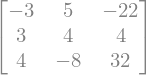

'rref and pivot column indices:'

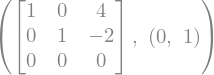

In [3]:
# In SymPy:
from sympy import Matrix
A = Matrix([[-3, 5, -22],[3,4,4],[4, -8, 32]])
display("Matrix:", A)
display("rref and pivot column indices:", A.rref())

Numpy array:  
 [[ -3   5 -22]
 [  3   4   4]
 [  4  -8  32]] 
-------------------
SymPy Matrix and call to rref as before:


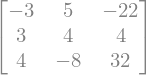

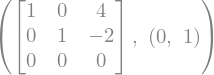

In [4]:
# Numpy doesn't have an rref function, but the conversion back to Sympy is straightforward:

import numpy as np
B = np.array([-3, 5, -22,3,4,4,4, -8, 32]).reshape(3,3)
print("Numpy array:  \n", B, "\n-------------------") 
print("SymPy Matrix and call to rref as before:")
C = sp.Matrix(B)
display(C)
display(C.rref())


## Doing rref more systematically

* **Step 1.** Locate the leftmost column that does not consist entirely of zeros.
* **Step 2.** Interchange the top row with another row, if necessary, to bring a nonzero entry to the top of the column found in Step 1.
* **Step 3.** If the entry that is now at the top of the column found in Step 1 is $a$, multiply the first row by $1/a$ in order to introduce a leading 1.
* **Step 4.** Add suitable multiples of the top row to the rows below so that all entries below the leading 1 become zeros.
* **Step 5.** Now cover the top row in the matrix and begin again with Step 1 applied to the submatrix that remains. Continue in this way until the *entire* matrix is in row echelon form.
* **Step 6.** Beginning with the last nonzero row and working upward, add suitable multiples of each row to the rows above to introduce zeros above the leading 1’s.


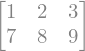

In [5]:
# Transpose of a Matrix

A = sp.Matrix([[1,2,3],[7,8,9]])
A

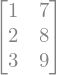

In [6]:
B = A.transpose()
B

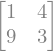

In [7]:
A = sp.Matrix([[1,4],[9,3]])
A

In [8]:
A.det()

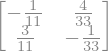

In [9]:
A.inv()

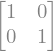

In [10]:
A * A.inv()

'Matrix:'

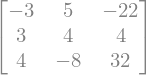

'rref and pivot column indices:'

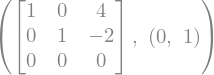

In [11]:
from sympy import Matrix
A = Matrix([[-3, 5, -22],[3,4,4],[4, -8, 32]])
display("Matrix:", A)
display("rref and pivot column indices:", A.rref())
display(A.rank())
display(A.det())

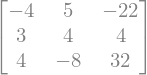

In [12]:
A = Matrix([[-4, 5, -22],[3,4,4],[4, -8, 32]])
display(A)
display(A.rank())
display(A.det())

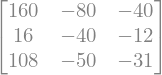

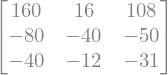

In [13]:
A_cofactor = A.cofactor_matrix()
display(A_cofactor)
A_cofactor_T = A_cofactor.transpose()
display(A_cofactor_T)

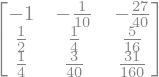

In [14]:
A_inverse_1 = 1/(A.det()) * A_cofactor_T
A_inverse_2 = A.inv()
assert(A_inverse_1 == A_inverse_2)
display(A_inverse_1)

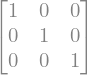

In [15]:
# Get the identity matrix

A_inverse_1 * A

In [16]:
A.is_anti_symmetric()

False

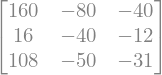

In [17]:
display(A.cofactor_matrix())

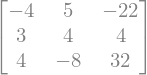

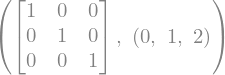

In [18]:
display(A)
display(A.rref())

display(A.rank())